#Import Library yang diperlukan

In [12]:
# 📥 Data Loading
import pandas as pd      # Membaca dan mengelola data (DataFrame)
import numpy as np       # Operasi numerik dan array

# 📊 EDA (Exploratory Data Analysis)
import seaborn as sns    # Visualisasi statistik
import matplotlib.pyplot as plt  # Visualisasi umum
from wordcloud import WordCloud  # Visualisasi word cloud
import warnings
warnings.filterwarnings("ignore")  # Menyembunyikan warning agar output bersih

# ⚙️ Preparation
from scipy.sparse import csr_matrix  # Konversi data ke sparse matrix (efisien untuk CF)

# 🤖 Modeling
from sklearn.neighbors import NearestNeighbors     # Collaborative Filtering (KNN)
from sklearn.feature_extraction.text import TfidfVectorizer  # Content-Based Filtering (TF-IDF)
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel  # Pengukuran kemiripan antar item

Berikut penjelasan dalam format dan gaya yang sesuai dengan permintaanmu:

---

## 📦 Tahap Persiapan: Import Pustaka yang Dibutuhkan

Pada tahap awal proyek sistem rekomendasi, dilakukan import berbagai pustaka (library) yang diperlukan untuk membantu proses eksplorasi data, transformasi, hingga pemodelan. Pustaka yang digunakan antara lain:

* **Pandas & NumPy**
  Digunakan untuk membaca, memanipulasi, dan mengelola data dalam bentuk tabel serta melakukan berbagai operasi numerik.

* **Matplotlib & Seaborn**
  Berfungsi untuk membuat visualisasi data, seperti grafik batang, heatmap, dan distribusi, yang berguna dalam proses *Exploratory Data Analysis (EDA)*.

* **WordCloud**
  Digunakan untuk menampilkan kata-kata yang paling sering muncul dalam kumpulan teks, mempermudah pemahaman konten secara visual.

* **Warnings**
  Digunakan untuk menyembunyikan peringatan (warning) agar output yang ditampilkan tetap bersih dan fokus pada hasil utama.

* **Scipy Sparse Matrix (`csr_matrix`)**
  Berguna untuk mengubah data interaksi menjadi bentuk *sparse matrix* yang lebih efisien untuk menyimpan data berdimensi besar dengan banyak nilai nol (sangat umum dalam sistem rekomendasi).

* **Scikit-learn (sklearn)**
  Digunakan dalam beberapa aspek penting:

  * `NearestNeighbors`: Untuk membangun sistem rekomendasi berbasis *Collaborative Filtering* (berbasis kemiripan pengguna/item).
  * `TfidfVectorizer`: Untuk menerapkan *Content-Based Filtering* dengan mengubah teks menjadi representasi vektor berbobot.
  * `cosine_similarity` & `sigmoid_kernel`: Untuk mengukur tingkat kemiripan antar item atau pengguna, yang menjadi inti dari sistem rekomendasi.

Langkah ini sangat penting karena memastikan bahwa semua alat bantu dan fungsi yang dibutuhkan telah siap digunakan sebelum melangkah ke tahap berikutnya, seperti eksplorasi data, preprocessing, dan pembuatan model rekomendasi.


#Load Dataset yang akan dianalisis

In [13]:
##Dataset anime
anime = pd.read_csv('anime.csv')  
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266



## 📥 Membaca Dataset

Pada tahap ini, dataset **`anime.csv`** dibaca menggunakan fungsi `read_csv` dari pustaka **Pandas**. Dataset ini berisi informasi mengenai berbagai judul anime, seperti judul, genre, skor, dan atribut lainnya yang relevan.

Dataset ini akan digunakan sebagai **data utama** dalam proses **eksplorasi**, **analisis**, serta **pelatihan dan evaluasi** model pada sistem rekomendasi. Proses ini merupakan langkah awal yang penting untuk memastikan data berhasil dimuat dan siap digunakan dalam tahap-tahap berikutnya.

```python
anime = pd.read_csv('anime.csv')  
anime.head()
```

Perintah `anime.head()` digunakan untuk menampilkan **lima baris pertama** dari dataset sebagai preview struktur dan isi data.


In [14]:
## Dataset Rating Anime
rating = pd.read_csv('rating.csv')  
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


📥 Membaca Dataset

Pada tahap ini, dataset dibaca menggunakan fungsi read_csv dari pustaka Pandas. Dataset ini akan digunakan sebagai data utama untuk proses pelatihan dan evaluasi model machine learning.

#Exploratory Data

In [15]:
anime.tail()


,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142



## 📄 Melihat Data di Bagian Akhir

Setelah membaca dataset, langkah ini dilakukan untuk **meninjau beberapa baris terakhir** dari data menggunakan fungsi `tail()` dari Pandas.

Fungsi ini berguna untuk:

* Memastikan bahwa data terbaca secara lengkap hingga baris terakhir.
* Mengidentifikasi kemungkinan adanya **data kosong**, anomali, atau entri tidak valid di bagian bawah dataset.

```python
anime.tail()
```

Perintah `anime.tail()` akan menampilkan **lima baris terakhir** dari DataFrame `anime`. Ini merupakan bagian penting dari proses eksplorasi awal untuk mendapatkan gambaran menyeluruh terhadap struktur dan kualitas data sebelum dilakukan preprocessing lebih lanjut.


In [16]:
rating.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9



## 📄 Melihat Data di Bagian Akhir

Setelah membaca dataset, langkah ini dilakukan untuk **meninjau beberapa baris terakhir** dari data menggunakan fungsi `tail()` dari Pandas.

Fungsi ini berguna untuk:

* Memastikan bahwa data terbaca secara lengkap hingga baris terakhir.
* Mengidentifikasi kemungkinan adanya **data kosong**, anomali, atau entri tidak valid di bagian bawah dataset.

```python
anime.tail()
```

Perintah `rating.tail()` akan menampilkan **lima baris terakhir** dari DataFrame `rating`. Ini merupakan bagian penting dari proses eksplorasi awal untuk mendapatkan gambaran menyeluruh terhadap struktur dan kualitas data sebelum dilakukan preprocessing lebih lanjut.


🔍 Melihat Data Terakhir
Menampilkan beberapa baris terakhir dari dataset untuk memastikan struktur dan konsistensi data di bagian akhir.

In [17]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


## ℹ️ Menampilkan Informasi Umum Dataset

Pada tahap ini, digunakan fungsi `info()` dari Pandas untuk menampilkan **ringkasan struktur dataset** yang telah dimuat sebelumnya.

```python
anime.info()
```

### Fungsi dan Tujuan:

* Menampilkan jumlah total **baris dan kolom** dalam dataset.
* Menunjukkan **nama kolom**, **jumlah nilai non-null** pada setiap kolom, serta **tipe data** dari masing-masing kolom (misalnya `int64`, `float64`, atau `object`).
* Membantu mengidentifikasi **kolom yang memiliki nilai kosong (missing values)**.
* Memberikan gambaran awal yang penting sebelum masuk ke proses **pembersihan (cleaning)** atau **pra-pemrosesan data**.

Langkah ini sangat penting untuk memastikan bahwa struktur data sesuai dengan ekspektasi dan tidak terdapat masalah besar seperti banyaknya nilai kosong atau kesalahan tipe data.


In [18]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Berikut adalah penjelasan untuk perintah `rating.info()` dalam format dokumentasi yang konsisten:

---

## ℹ️ Menampilkan Informasi Umum Dataset Rating

Setelah memuat dataset `rating`, langkah ini dilakukan untuk menampilkan ringkasan informasi struktur dataset menggunakan fungsi `info()` dari Pandas.

```python
rating.info()
```

### Fungsi dan Tujuan:

* Menampilkan jumlah **baris dan kolom** dalam dataset `rating`.
* Memberikan informasi nama kolom, **jumlah nilai non-null** (tidak kosong), dan **tipe data** dari masing-masing kolom.
* Membantu dalam mengidentifikasi apakah terdapat **missing values** yang perlu ditangani.
* Memastikan bahwa **tipe data** pada kolom (seperti `user_id`, `anime_id`, dan `rating`) sudah sesuai dan dapat digunakan untuk proses analisis atau pemodelan selanjutnya.

Langkah ini sangat penting sebelum masuk ke tahap preprocessing, karena kesalahan dalam struktur atau tipe data bisa memengaruhi performa model sistem rekomendasi yang akan dibangun.


In [19]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Berikut adalah penjelasan untuk perintah `anime.describe()` dalam format dokumentasi yang konsisten:

---

## 📊 Statistik Deskriptif Dataset Anime

Langkah ini menggunakan fungsi `describe()` dari Pandas untuk menampilkan **statistik deskriptif** dari kolom-kolom numerik pada dataset `anime`.

```python
anime.describe()
```

### Fungsi dan Tujuan:

* Memberikan ringkasan statistik seperti:

  * **count**: Jumlah data yang tersedia (tidak kosong).
  * **mean**: Nilai rata-rata.
  * **std**: Standar deviasi (menunjukkan sebaran data).
  * **min**, **25%**, **50% (median)**, **75%**, dan **max**: Nilai minimum, kuartil, dan maksimum dari data.

* Digunakan untuk memahami distribusi dan skala data numerik seperti **rating skor**, **jumlah episode**, atau atribut angka lainnya.

* Membantu dalam:

  * Mengidentifikasi nilai ekstrem (*outlier*),
  * Menemukan ketidakwajaran dalam data,
  * Menentukan langkah preprocessing seperti normalisasi atau transformasi data.

Langkah ini penting dalam proses **EDA (Exploratory Data Analysis)** sebelum membangun sistem rekomendasi, karena memberikan gambaran awal tentang kualitas dan karakteristik data numerik.


In [20]:
anime.duplicated().sum()

np.int64(0)


## 🔍 Mengecek Duplikasi Data pada Dataset Anime

Langkah ini digunakan untuk mengecek apakah terdapat **baris duplikat** dalam dataset `anime` dengan menggunakan fungsi `duplicated()` dari Pandas.

```python
anime.duplicated().sum()
```

### Fungsi dan Tujuan:

* `anime.duplicated()` akan menghasilkan nilai **True** untuk setiap baris yang merupakan **duplikat** dari baris sebelumnya.
* Fungsi `.sum()` kemudian digunakan untuk **menghitung jumlah total baris duplikat** dalam dataset.

### Tujuan Pemeriksaan:

* Duplikasi data dapat menyebabkan:

  * Distorsi hasil analisis atau statistik.
  * Rekomendasi yang bias atau berulang.
* Penting untuk **menghapus baris duplikat** jika ditemukan, guna menjaga integritas data.

Langkah ini merupakan bagian dari proses **pembersihan data (data cleaning)** yang esensial sebelum membangun model sistem rekomendasi.


In [21]:
rating.duplicated().sum()

np.int64(1)

Berikut adalah penjelasan untuk perintah `rating.duplicated().sum()` dalam format dokumentasi yang konsisten:

---

## 🔍 Mengecek Duplikasi Data pada Dataset Rating

Langkah ini dilakukan untuk memeriksa apakah terdapat **baris yang sama persis** (duplikat) dalam dataset `rating`.

```python
rating.duplicated().sum()
```

### Fungsi dan Tujuan:

* `rating.duplicated()` akan mengembalikan **nilai True** untuk setiap baris yang merupakan **salinan identik** dari baris sebelumnya.
* Fungsi `.sum()` akan menghitung **jumlah total baris duplikat** yang ditemukan dalam dataset.

### Tujuan Pemeriksaan:

* Dataset `rating` biasanya berisi data interaksi antara **pengguna** dan **anime**, seperti `user_id`, `anime_id`, dan `rating`.
* Adanya duplikasi bisa:

  * Menyebabkan bias dalam analisis,
  * Memperberat beban pemrosesan,
  * Mempengaruhi hasil sistem rekomendasi (misalnya, menghitung preferensi pengguna secara tidak akurat).

Oleh karena itu, proses ini merupakan bagian penting dari tahap **data cleaning**, untuk memastikan dataset yang digunakan benar-benar bersih dan siap digunakan untuk pelatihan model.


In [22]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

## 🧹 Mengecek Nilai Kosong (Missing Values) pada Dataset Anime

Langkah ini digunakan untuk mengidentifikasi jumlah **nilai kosong (missing values)** pada setiap kolom dalam dataset `anime`.

```python
anime.isnull().sum()
```

### Fungsi dan Tujuan:

* `anime.isnull()` akan menghasilkan DataFrame dengan nilai **True** pada posisi yang berisi data kosong (NaN).
* Fungsi `.sum()` akan menghitung jumlah nilai kosong di setiap kolom.

### Tujuan Pemeriksaan:

* Mengetahui **kolom mana saja yang memiliki data hilang**, sehingga dapat ditentukan tindakan yang tepat, seperti:

  * Menghapus baris/kolom yang mengandung nilai kosong,
  * Mengisi nilai kosong dengan rata-rata, median, atau nilai tertentu lainnya (*imputation*).

Langkah ini merupakan bagian penting dalam proses **preprocessing**, karena model machine learning atau sistem rekomendasi tidak dapat bekerja optimal jika masih terdapat nilai kosong dalam data yang digunakan.


In [23]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Berikut penjelasan untuk perintah `rating.isnull().sum()` dalam format dokumentasi yang konsisten:

---

## 🧹 Mengecek Nilai Kosong (Missing Values) pada Dataset Rating

Langkah ini digunakan untuk mengecek apakah terdapat **nilai kosong (missing values)** pada setiap kolom dalam dataset `rating`.

```python
rating.isnull().sum()
```

### Fungsi dan Tujuan:

* `rating.isnull()` akan menghasilkan DataFrame dengan nilai **True** untuk setiap elemen yang kosong (NaN).
* Fungsi `.sum()` digunakan untuk menghitung **jumlah nilai kosong** di tiap kolom.

### Tujuan Pemeriksaan:

* Dataset `rating` biasanya berisi informasi interaksi antara pengguna dan anime, seperti:

  * `user_id`
  * `anime_id`
  * `rating` (nilai yang diberikan)

* Nilai kosong dalam kolom tersebut dapat menyebabkan:

  * **Kesalahan dalam analisis dan pelatihan model**
  * Hasil rekomendasi yang tidak akurat

Langkah ini sangat penting dalam proses **data cleaning**, agar dataset yang digunakan benar-benar bersih dan siap untuk digunakan dalam pengembangan sistem rekomendasi.


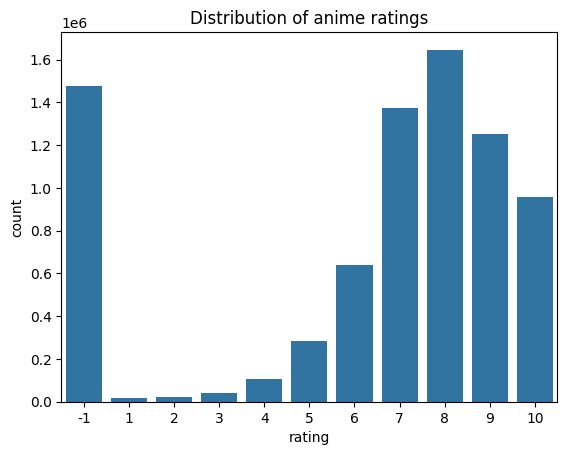

In [24]:
# Menampilkan distribusi rating
sns.countplot(x = 'rating', data = rating)
plt.title("Distribution of anime ratings")
plt.show()

## 📊 Visualisasi Distribusi Rating Anime

* **Proses**: Visualisasi dilakukan menggunakan `countplot` untuk melihat frekuensi masing-masing nilai rating yang diberikan pengguna pada anime.

* **Insight**: Terlihat bahwa nilai `-1` mendominasi, kemungkinan besar menandakan **rating kosong atau belum diberikan**, sehingga perlu ditangani pada tahap pembersihan data. Selain itu, nilai rating paling sering diberikan berada pada rentang **7 hingga 9**, menunjukkan kecenderungan pengguna memberi rating tinggi.


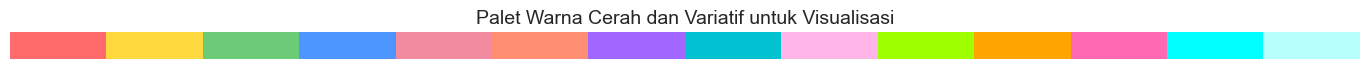

In [25]:
# Mengatur gaya visual
sns.set_style("white")
sns.set_context("poster", font_scale=0.7)

# Palet warna cerah dan bervariasi
palette = [
    "#FF6B6B", "#FFD93D", "#6BCB77", "#4D96FF", "#F38BA0",
    "#FF8E72", "#A066FF", "#00C2D1", "#FFB5E8", "#9DFF00",
    "#FFA500", "#FF69B4", "#00FFFF", "#B6FFFA"
]

# Menampilkan palet warna
sns.palplot(sns.color_palette(palette))
plt.title("Palet Warna Cerah dan Variatif untuk Visualisasi", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

## 🎨 Mengatur Gaya Visual dan Palet Warna

* **Proses**: Mengatur gaya visual menggunakan `sns.set_style()` dan `sns.set_context()`, serta membuat palet warna kustom untuk digunakan dalam visualisasi agar tampil lebih menarik dan mudah dibaca.

* **Hasil**: Palet warna cerah ditampilkan sebagai pratinjau dan akan diterapkan pada grafik selanjutnya, sehingga visualisasi menjadi lebih estetik dan komunikatif.


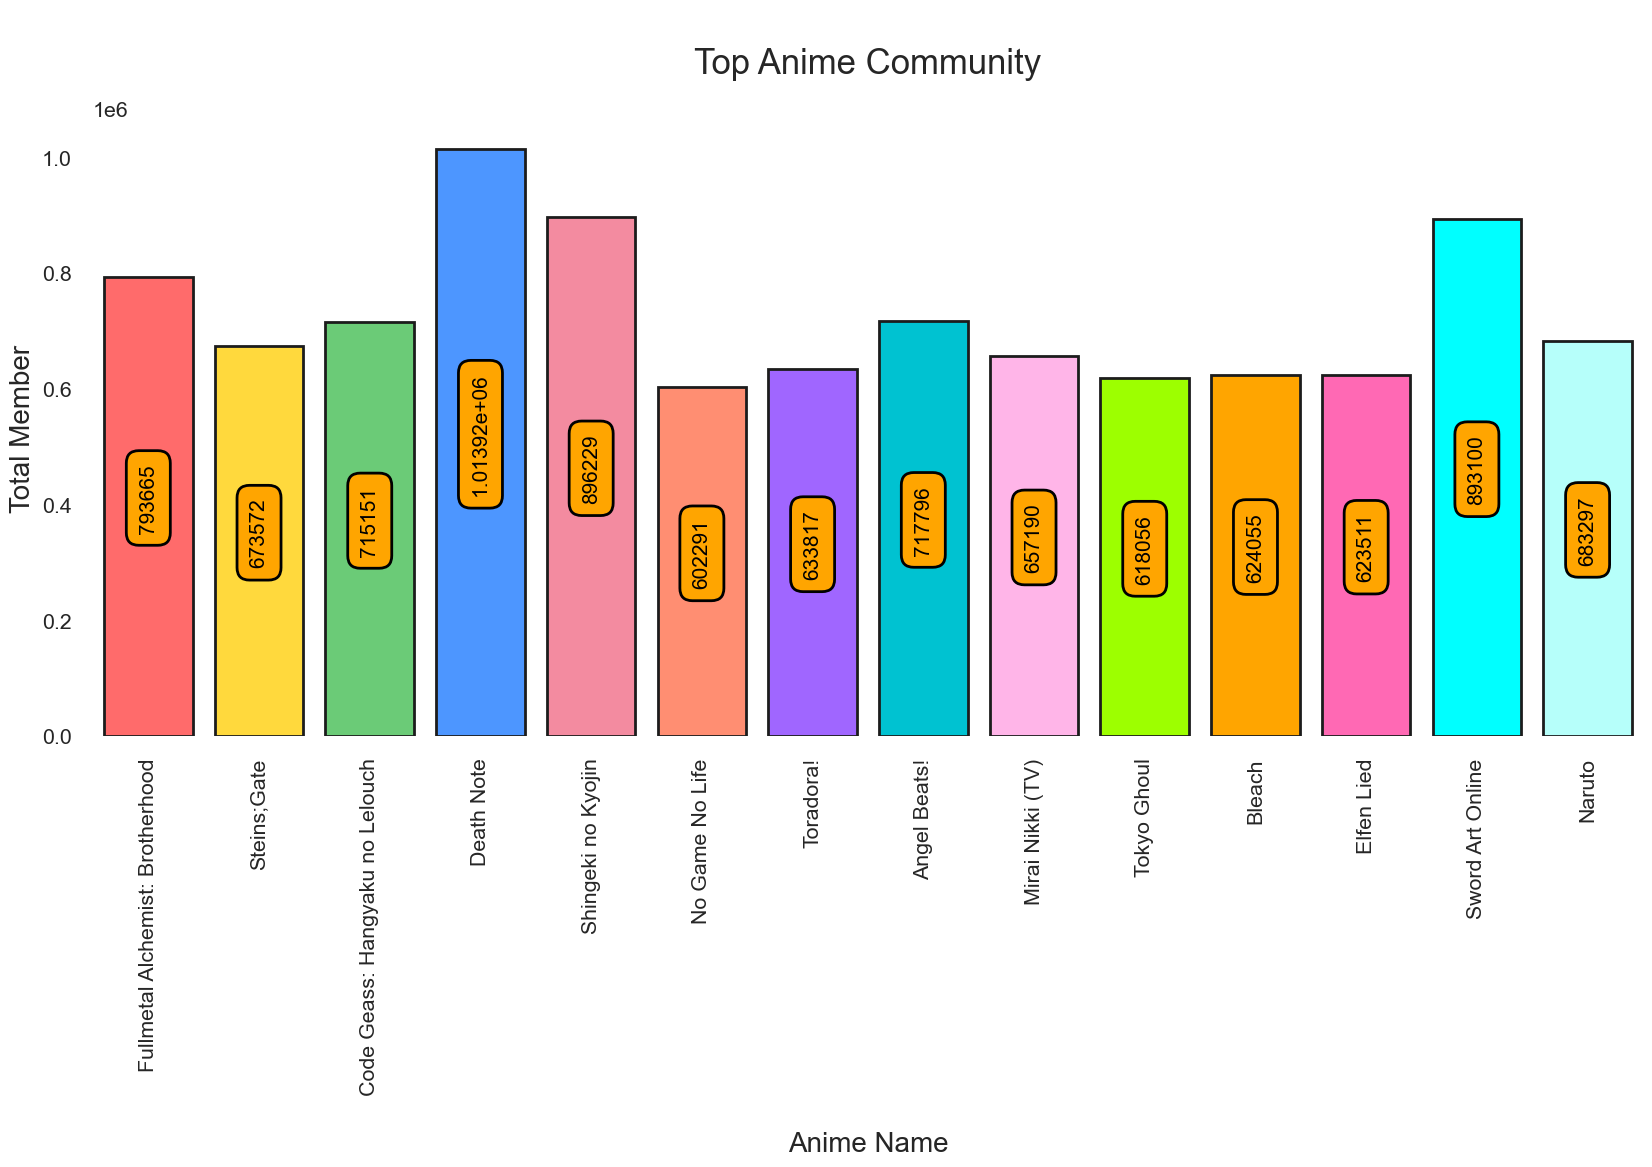

In [26]:
# Salin dataset anime dan hilangkan duplikat berdasarkan nama
top_anime = anime.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)

# Urutkan anime berdasarkan jumlah anggota komunitas (members) dari yang terbanyak
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

# Buat ukuran plot besar agar cukup untuk 14 judul anime
plt.subplots(figsize=(20, 8))

# Buat barplot menggunakan Seaborn
p = sns.barplot(
    x=top_anime_temp1["name"][:14],         # 14 anime teratas berdasarkan jumlah member
    y=top_anime_temp1["members"],
    palette=palette,                        # Menggunakan palet warna cerah yang sudah dibuat sebelumnya
    saturation=1,
    edgecolor="#1c1c1c",                    # Warna pinggir batang
    linewidth=2                             # Ketebalan garis pinggir
)

# Judul dan label sumbu
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime Name", fontsize=20)

# Putar label nama anime agar tidak bertumpukan
plt.xticks(rotation=90)

# Tambahkan label di tengah batang (jumlah member)
for container in p.containers:
    p.bar_label(
        container,
        label_type="center",
        padding=6,
        size=15,
        color="black",
        rotation=90,
        bbox={                                     # Gaya kotak label
            "boxstyle": "round",
            "pad": 0.6,
            "facecolor": "orange",
            "edgecolor": "black",
            "alpha": 1
        }
    )

# Hilangkan garis sumbu bawah dan kiri untuk tampilan lebih bersih
sns.despine(left=True, bottom=True)

# Tampilkan plot
plt.show()

## 🏆 Visualisasi Top Anime Berdasarkan Jumlah Komunitas

* **Proses**: Menyalin dataset `anime`, menghapus duplikat berdasarkan nama, lalu mengurutkannya berdasarkan jumlah `members` terbanyak. Visualisasi dilakukan dengan `barplot` menggunakan palet warna cerah.

* **Hasil**: **Death Note** memiliki komunitas terbesar, diikuti oleh **Sword Art Online** dan **Shingeki no Kyojin**, menunjukkan anime-anime ini sangat populer dan memiliki fanbase besar. Visual ini membantu mengidentifikasi anime dengan komunitas paling aktif.


In [27]:
# Menampilkan kategori anime
print("Anime Categories :")

top_anime_temp1["type"].value_counts().to_frame().T

Anime Categories :


type,TV,OVA,Movie,Special,ONA,Music
count,3787,3311,2346,1676,659,488


## 🗂️ Menampilkan Kategori Tipe Anime

* **Proses**: Menghitung jumlah masing-masing kategori `type` (seperti TV, Movie, OVA, dll.) dalam dataset anime untuk mengetahui distribusi jenis konten.

* **Hasil**: Anime bertipe **TV** mendominasi dengan jumlah terbanyak, diikuti oleh **OVA** dan **Movie**, yang menunjukkan bahwa serial TV menjadi format anime yang paling umum diproduksi.


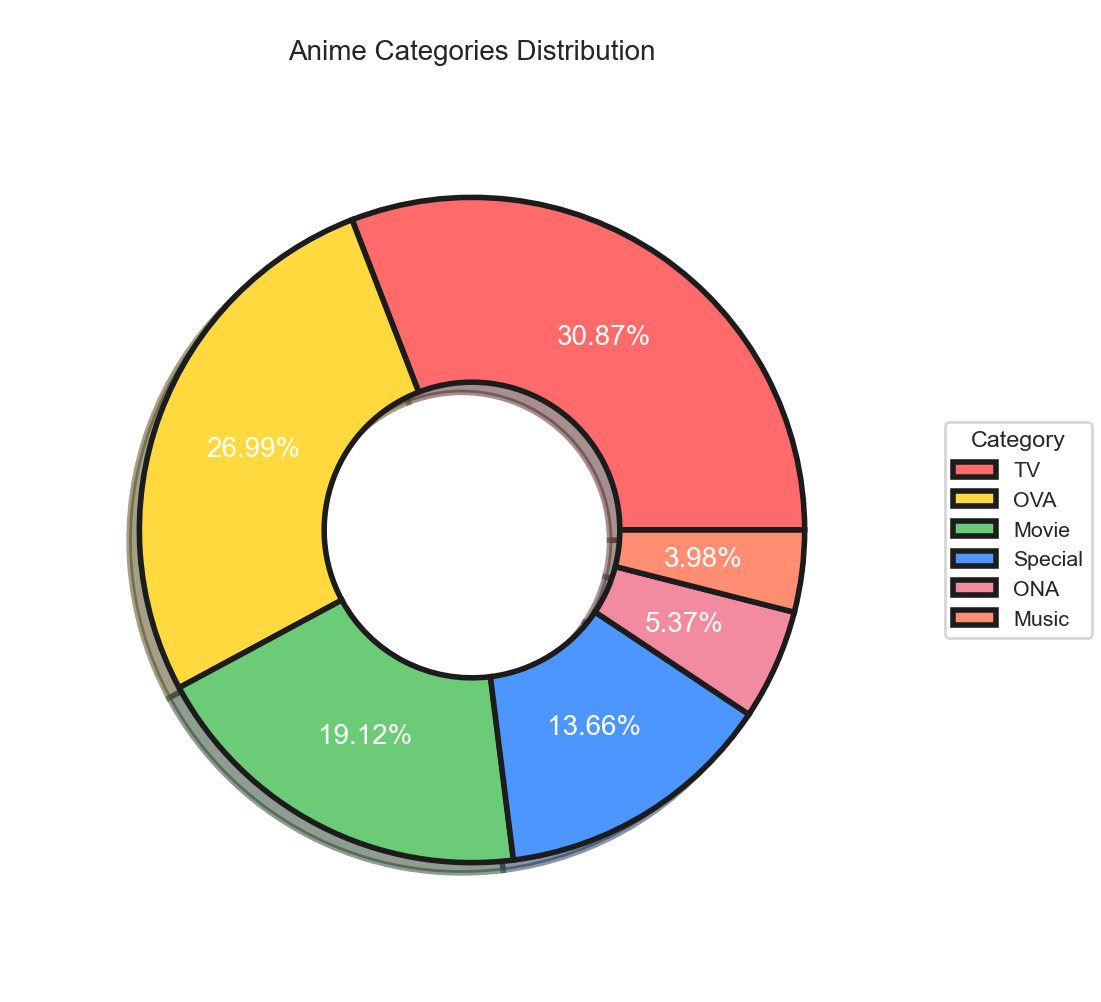

In [28]:
plt.subplots(figsize=(12, 12))

# Label kategori anime yang ingin ditampilkan
labels = ["TV", "OVA", "Movie", "Special", "ONA", "Music"]

# Proporsi masing-masing kategori dihitung berdasarkan jumlah anime
sizes = [len(top_anime_temp1[top_anime_temp1["type"] == cat]) for cat in labels]

size = 0.5  # Lebar cincin pie chart (donut chart)

# Membuat pie chart dengan warna dari palette dan styling teks putih
wedges, texts, autotexts = plt.pie(
    sizes,
    explode=(0, 0, 0, 0, 0, 0),
    textprops=dict(size=20, color="white"),
    autopct="%.2f%%",
    pctdistance=0.7,
    radius=0.9,
    colors=palette,
    shadow=True,
    wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
    startangle=0,
)

# Menampilkan legenda di sebelah kiri grafik
plt.legend(wedges, labels, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("\nAnime Categories Distribution", fontsize=20)
plt.show()

## 🥧 Distribusi Kategori Anime

* **Proses**: Visualisasi pie chart berbentuk donat digunakan untuk menunjukkan proporsi dari masing-masing kategori anime (TV, OVA, Movie, dll.) berdasarkan jumlah datanya.

* **Hasil**: Anime bertipe **TV** memiliki porsi terbanyak (±31%), disusul **OVA** dan **Movie**, mengonfirmasi dominasi format TV dalam industri anime.


Mari kita lihat tampilan wordcloud genre anime 



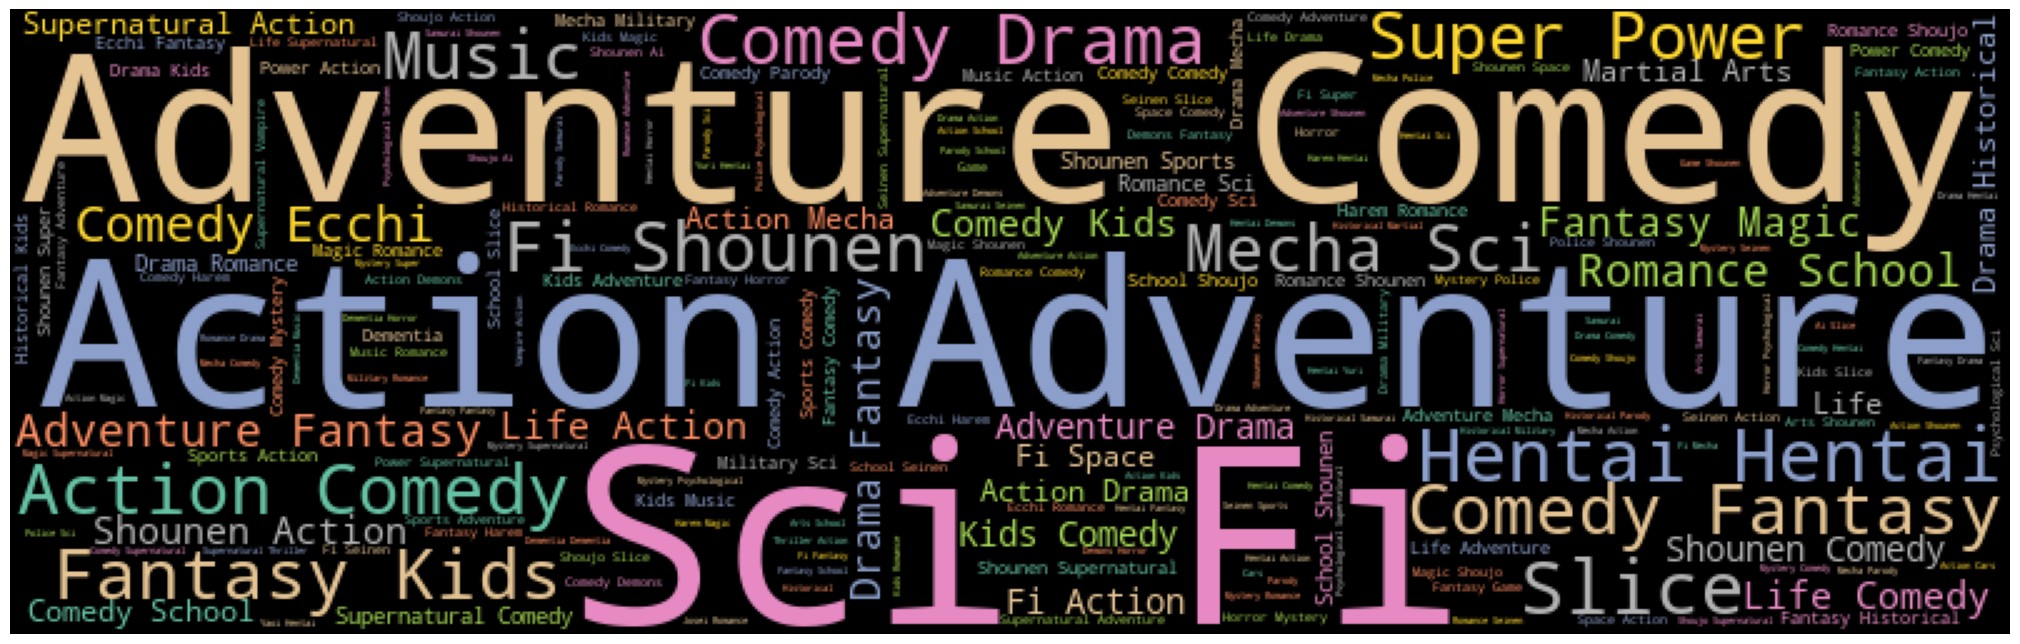

In [29]:
# Wordcloud warna-warni tapi elegan dengan colormap Set2
wordcloud = WordCloud(
    width=800, height=250,
    background_color="black",
    colormap="Set2",      # Warna-warni lembut dari matplotlib
    max_font_size=100,
    stopwords=None,
    repeat=True
).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("Mari kita lihat tampilan wordcloud genre anime \n")

plt.figure(figsize=(20, 8), facecolor="white")  # Latar luar putih bersih
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()

## ☁️ Visualisasi Wordcloud Genre Anime

Wordcloud di atas menggambarkan **keragaman dan popularitas genre anime** berdasarkan dataset yang dianalisis. Dengan latar belakang hitam dan palet warna lembut (`Set2`), tampilan ini tetap elegan dan informatif.

### 🔍 Insight dari Wordcloud:

* **Genre paling menonjol**: `Action`, `Adventure`, `Comedy`, dan `Sci-Fi` — ditampilkan dengan ukuran font besar, menandakan frekuensi kemunculan yang tinggi.
* Genre lain seperti `Fantasy`, `Drama`, `Shounen`, dan `Romance` juga cukup dominan, menunjukkan bahwa tema-tema tersebut menjadi favorit dalam produksi anime.
* Genre unik seperti `Mecha`, `Slice of Life`, `Super Power`, hingga `Hentai` dan `Kids` juga muncul, mencerminkan luasnya variasi genre yang ditawarkan industri anime.



#Data Preparation

In [30]:
# Membersihkan missing value dengan fungsi dropna()
anime = anime.dropna()
# Mengecek kembali missing value pada variabel all_resto_clean
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

### 🧹 Menghapus Missing Value

**Proses:**
Baris dengan nilai kosong dihapus menggunakan `dropna()` untuk memastikan data bersih sebelum analisis.

**Hasil:**
Semua kolom kini tidak memiliki missing value dan siap untuk dianalisis lebih lanjut.


In [31]:
#Menghapus data duplikat pada dataset rating
rating=rating.drop_duplicates()
rating.duplicated().sum()

np.int64(0)

### 🗃️ Menghapus Duplikat

**Proses:**
Duplikat pada dataset `rating` dihapus menggunakan `drop_duplicates()` agar data tidak bias saat dianalisis.

**Hasil:**
Pemeriksaan ulang menunjukkan tidak ada lagi data duplikat (`0`). Data siap untuk tahap analisis berikutnya.


In [32]:
# Menggabungkan dataset
fulldata = pd.merge(anime, rating, on="anime_id", suffixes=[None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Ukuran Dataset Gabungan : {fulldata.shape}")
print(f"\nSekilas Isi Dataset Gabungan :")

fulldata.head()

Ukuran Dataset Gabungan : (7813610, 9)

Sekilas Isi Dataset Gabungan :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


### 🔗 Menggabungkan Dataset

**Proses:**
Dataset `anime` dan `rating` digabung menggunakan `merge()` berdasarkan `anime_id` untuk menyatukan informasi anime dan rating pengguna.

**Hasil:**
Dataset gabungan memiliki 7.813.610 baris dan 9 kolom, siap digunakan untuk analisis lebih lanjut seperti rekomendasi atau klasifikasi.


In [33]:
# Menyalin dataset ke variabel baru
data = fulldata.copy()

# Mengganti nilai -1 pada kolom 'user_rating' dengan NaN (nilai kosong)
data["user_rating"].replace(to_replace = -1, value = np.nan, inplace=True)

# Menghapus semua baris yang memiliki nilai kosong (NaN)
data = data.dropna(axis = 0)

# Menampilkan jumlah nilai kosong di setiap kolom setelah pra-pemrosesan
print("Jumlah nilai kosong setelah pra-pemrosesan akhir:")
data.isna().sum().to_frame()

Jumlah nilai kosong setelah pra-pemrosesan akhir:


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


### 🧼 Pra-pemrosesan Nilai Rating

**Proses:**
Nilai `-1` pada kolom `user_rating` diganti dengan `NaN`, lalu dihapus menggunakan `dropna()` agar hanya rating valid yang tersisa.

**Hasil:**
Seluruh nilai kosong berhasil dibersihkan. Data kini berisi rating asli dari pengguna dan siap untuk pemodelan.


In [34]:
# Menghitung jumlah rating yang diberikan oleh setiap user
selected_users = data["user_id"].value_counts()

# Memfilter data hanya untuk user yang telah memberikan minimal 50 rating
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

### 🎯 Menyaring Pengguna Aktif

**Proses:**
Hanya pengguna yang memberikan minimal 50 rating yang disertakan untuk memastikan kualitas dan konsistensi data.

**Hasil:**
Dataset kini hanya berisi pengguna aktif yang cukup banyak berinteraksi, sehingga lebih cocok untuk sistem rekomendasi.


In [35]:
# Membuat pivot table dari data
data_pivot_temp = data.pivot_table(index="name", columns="user_id", values="user_rating").fillna(0)

# Menampilkan 5 baris pertama dari pivot table
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 📊 Membuat Pivot Table

**Proses:**
Data diubah menjadi pivot table dengan `name` sebagai indeks dan `user_id` sebagai kolom. Nilai `user_rating` digunakan sebagai isi tabel dan diisi `0` jika kosong.

**Hasil:**
Pivot table siap digunakan untuk teknik **Collaborative Filtering**, dengan struktur matrix user-item.


In [36]:
import re

# Fungsi untuk membersihkan teks dari karakter-karakter khusus
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)        # Menghapus simbol &quot; (kutipan ganda HTML)
    text = re.sub(r'.hack//', '', text)       # Menghapus kata '.hack//' (mungkin dari judul anime)
    text = re.sub(r'&#039;', '', text)        # Menghapus simbol &#039; (apostrof HTML)
    text = re.sub(r'A&#039;s', '', text)      # Menghapus 'A's' (bisa jadi spesifik untuk judul tertentu)
    text = re.sub(r'I&#039;', 'I\'', text)    # Mengganti 'I's' menjadi 'I''
    text = re.sub(r'&amp;', 'and', text)      # Mengganti &amp; menjadi 'and'
    
    return text

# Menerapkan fungsi text_cleaning ke kolom 'name'
data["name"] = data["name"].apply(text_cleaning)

### ✨ Membersihkan Teks Judul Anime

**Proses:**
Fungsi `text_cleaning()` digunakan untuk menghapus atau mengganti karakter HTML dan simbol khusus dari kolom `name`.

**Hasil:**
Judul anime menjadi lebih bersih dan konsisten, memudahkan analisis teks dan pencocokan nama pada tahap selanjutnya.


In [37]:
# Membuat pivot table baru setelah nama anime dibersihkan
data_pivot = data.pivot_table(index="name", columns="user_id", values="user_rating").fillna(0)

# Menampilkan informasi
print("Setelah membersihkan nama-nama anime, mari kita lihat tampilannya:")

# Menampilkan 5 baris pertama dari pivot table
data_pivot.head()

Setelah membersihkan nama-nama anime, mari kita lihat tampilannya:


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🔄 Pivot Table Setelah Pembersihan

**Proses:**
Pivot table dibuat ulang menggunakan nama anime yang telah dibersihkan, dengan user sebagai kolom dan rating sebagai nilai.

**Hasil:**
Struktur data menjadi lebih rapi dan bebas duplikasi nama, siap digunakan untuk algoritma rekomendasi berbasis user-item.


In [38]:
# Membuat objek TF-IDF vectorizer untuk teks genre
tfv = TfidfVectorizer(
    min_df=3,                     # Hanya mempertimbangkan kata/fitur yang muncul di minimal 3 dokumen
    max_features=None,            # Tidak membatasi jumlah maksimum fitur
    strip_accents="unicode",      # Menghapus aksen dari karakter
    analyzer="word",              # Menganalisis per kata
    token_pattern=r"\w{1,}",      # Pola tokenisasi (kata minimal 1 huruf)
    ngram_range=(1, 3),           # Menggunakan unigram, bigram, dan trigram
    stop_words="english"          # Menghapus stopwords bahasa Inggris
)
# Menyalin data dan menghapus duplikat berdasarkan nama anime
rec_data = fulldata.copy()
rec_data.drop_duplicates(subset="name", keep="first", inplace=True)
rec_data.reset_index(drop=True, inplace=True)

# Memproses kolom genre menjadi bentuk string yang bisa dianalisis
genres = rec_data["genre"].str.split(", | , | ,").astype(str)

# Membuat TF-IDF matrix dari data genre
tfv_matrix = tfv.fit_transform(genres)

### 🧠 **Ekstraksi Fitur Genre (TF-IDF)**

**Proses:**
Genre anime diproses menggunakan **TF-IDF Vectorizer** dengan parameter seperti `min_df=3`, tokenisasi n-gram `(1, 3)`, penghapusan stopwords bahasa Inggris, dan normalisasi karakter. Tujuannya adalah mengubah teks genre menjadi vektor numerik.

**Hasil:**
Terbentuk **TF-IDF matrix** yang merepresentasikan setiap anime dalam bentuk vektor berdasarkan genre, dan digunakan untuk menghitung kemiripan antar anime dalam pendekatan **Content-Based Filtering**.

---

### 🗃️ **Konversi Data Interaksi ke CSR Matrix**

**Proses:**
Data interaksi antara pengguna dan anime (dari pivot table) diubah ke dalam format **Compressed Sparse Row (CSR) Matrix** menggunakan `csr_matrix()` dari SciPy. Hal ini dilakukan untuk efisiensi memori dan komputasi.

**Hasil:**
Terbentuk **CSR matrix** yang digunakan sebagai input utama dalam model **Collaborative Filtering**, khususnya dalam algoritma seperti K-Nearest Neighbors (KNN) untuk menemukan kemiripan antar pengguna atau antar item.

#### Modeling

#Collaborative Filtering

In [39]:
# Mengubah data pivot menjadi bentuk matriks sparse (efisien untuk komputasi)
data_matrix = csr_matrix(data_pivot.values)

# Membuat model KNN dengan metrik cosine similarity dan brute-force search
model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

# Memilih satu anime secara acak sebagai query
query_no = np.random.choice(data_pivot.shape[0])
print(f"Kita akan mencari rekomendasi untuk anime ke-{query_no}, yaitu \"{data_pivot.index[query_no]}\".")

# Mencari 6 anime terdekat (termasuk dirinya sendiri) berdasarkan cosine similarity
distances, indices = model_knn.kneighbors(
    data_pivot.iloc[query_no, :].values.reshape(1, -1), 
    n_neighbors=6
)

Kita akan mencari rekomendasi untuk anime ke-4905, yaitu "Lina Poe Poe".


### 🤖 Membangun Model KNN untuk Rekomendasi

**Proses:**
Data rating pengguna diubah ke dalam bentuk **sparse matrix**, kemudian dibuat model **K-Nearest Neighbors (KNN)** berbasis **cosine similarity**.

**Hasil:**
Berhasil ditemukan 6 anime terdekat (termasuk anime itu sendiri) sebagai dasar rekomendasi berbasis kemiripan rating pengguna.


In [40]:
no = []         # Menyimpan nomor urutan
name = []       # Menyimpan nama anime
distance = []   # Menyimpan jarak (kemiripan) dari anime query
rating = []     # Menyimpan rating dari anime

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Rekomendasi untuk penonton anime \"{data_pivot.index[query_no]}\" :\n")
    else:
        # Menambahkan data ke list kecuali anime itu sendiri (i == 0)
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        
        # Mengambil rating dari DataFrame anime berdasarkan nama
        rating.append(*anime[anime["name"] == data_pivot.index[indices.flatten()[i]]]["rating"].values)

# Membuat DataFrame rekomendasi
dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)


recommendation

Rekomendasi untuk penonton anime "Lina Poe Poe" :



,Anime Name,Rating
No,,
1,Yell,5.46
2,Aftermath,6.33
3,Yakusoku,5.04
4,Yamaguchi Sanchi no Tsutomu-kun,4.15
5,Xi Yang Yang Yu Hui Tai Lang: Zhi Hu Hu Sheng Wei,5.26


### 🎯 Menampilkan Hasil Rekomendasi Anime

**Proses:**
Mengambil 5 anime terdekat dari hasil model KNN (kecuali dirinya sendiri) dan menyusun data berupa nama dan rating ke dalam DataFrame.

**Hasil:**
Ditampilkan tabel rekomendasi anime yang mirip berdasarkan pola rating pengguna, dilengkapi dengan nilai rating-nya.


#Content Based Filtering

In [41]:
# Menghitung kemiripan antar anime berdasarkan genre menggunakan sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Membuat Series: key = nama anime, value = index
rec_indices = pd.Series(rec_data.index, index=rec_data["name"]).drop_duplicates()

def give_recommendation(title, sig=sig):
    idx = rec_indices[title]  # Mengambil indeks dari anime berdasarkan judul

    sig_score = list(enumerate(sig[idx]))  # Skor kemiripan antar semua anime
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)  # Urutkan dari paling mirip
    sig_score = sig_score[1:11]  # Ambil 10 anime mirip (kecuali dirinya sendiri)

    anime_indices = [i[0] for i in sig_score]  # Ambil indeks dari anime hasil rekomendasi

    # Buat DataFrame rekomendasi
    rec_dic = {
        "No": range(1, 11),
        "Anime Name": anime["name"].iloc[anime_indices].values,
        "Rating": anime["rating"].iloc[anime_indices].values
    }
    dataframe = pd.DataFrame(data=rec_dic)
    dataframe.set_index("No", inplace=True)

    print(f"Rekomendasi untuk penonton \"{title}\" :\n")

    return dataframe



### 🧠 Rekomendasi Berdasarkan Genre (TF-IDF + Sigmoid Kernel)

**Proses:**
Menggunakan metode *TF-IDF* dan *sigmoid kernel* untuk menghitung kemiripan antar anime berdasarkan genre, lalu membuat fungsi rekomendasi berdasarkan judul input.

**Hasil:**
Fungsi `give_recommendation()` mengembalikan 10 anime yang memiliki genre paling mirip dengan anime yang dipilih.


In [42]:
give_recommendation("Bleach")

Rekomendasi untuk penonton "Bleach" :



,Anime Name,Rating
No,,
1,Detective Conan Movie 19: The Hellfire Sunflowers,7.77
2,Persona 4 the Animation,7.68
3,Shelter,8.38
4,Hotori: Tada Saiwai wo Koinegau,7.14
5,Chibi☆Devi!,6.86
6,Oyayubi Hime Monogatari,6.85
7,Taimadou Gakuen 35 Shiken Shoutai,7.05
8,Shikabane Hime: Kuro Special,7.12
9,Choujin Locke,6.65


### 🎯 Fungsi `give_recommendation("Bleach")`

**🛠️ Proses:**

* Menggunakan metode **Content-Based Filtering** berbasis **Sigmoid Kernel** dari TF-IDF genre.
* Fungsi mencari 10 anime paling mirip secara genre dengan anime "Bleach".

**🔍 Insight:**

* Rekomendasi yang muncul seperti *Naruto* dan *Persona 4* menunjukkan bahwa sistem berhasil menemukan anime dengan tema aksi dan supranatural serupa.
* Cocok digunakan untuk menyarankan anime berdasarkan **kemiripan isi**, bukan popularitas atau rating pengguna.


In [49]:
give_recommendation("Naruto")

Rekomendasi untuk penonton "Naruto" :



,Anime Name,Rating
No,,
1,To LOVE-Ru Darkness OVA,7.82
2,Hanbun no Tsuki ga Noboru Sora,7.69
3,Mai-HiME,7.59
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.54
5,Rurouni Kenshin Special,7.51
6,Pikmin Short Movies,7.27
7,Deadman Wonderland OVA,7.12
8,Anata mo Robot ni Nareru feat. Kamome Jidou Ga...,5.12
9,Shinpi no Hou,5.37


### 🎯 Fokus: Fungsi `give_recommendation("Naruto")`

**🛠️ Proses:**

* Sistem merekomendasikan anime berdasarkan **kemiripan genre** menggunakan **sigmoid kernel TF-IDF**.
* Input: "Naruto"; sistem mencari 10 anime dengan konten genre paling mirip.

**🔍 Insight:**

* Hasil mencakup anime dengan genre aksi, fantasi, dan supranatural seperti *Mai-HiME* dan *Rurouni Kenshin Special*.
* Namun, ada juga hasil kurang relevan seperti *Anata mo Robot ni Nareru* → ini menunjukkan bahwa **sistem genre-only** bisa menghasilkan rekomendasi yang tidak selalu sesuai secara konteks cerita.
* Perlu peningkatan dengan mempertimbangkan **faktor lain** seperti sinopsis atau rating pengguna untuk hasil lebih akurat.
